<a href="https://colab.research.google.com/github/qa21336/HousingStatisticsAnalysis-/blob/main/src/UK_HPI_Wrangled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#imports
import pandas as pd


In [3]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/ADS Datasets/UK-HPI-full-file-2023-12.csv"
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139365 entries, 0 to 139364
Data columns (total 54 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    139365 non-null  object 
 1   RegionName              139365 non-null  object 
 2   AreaCode                139365 non-null  object 
 3   AveragePrice            139365 non-null  float64
 4   Index                   139365 non-null  float64
 5   IndexSA                 4884 non-null    float64
 6   1m%Change               138941 non-null  float64
 7   12m%Change              134553 non-null  float64
 8   AveragePriceSA          4884 non-null    float64
 9   SalesVolume             134898 non-null  float64
 10  DetachedPrice           132852 non-null  float64
 11  DetachedIndex           132852 non-null  float64
 12  Detached1m%Change       132462 non-null  float64
 13  Detached12m%Change      128196 non-null  float64
 14  SemiDetachedPrice   

In [5]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

In [6]:
df = df.drop(['IndexSA', 'AveragePriceSA'], axis=1)

In [7]:
df['Year'] = df['Date'].dt.year
df.drop('Date', axis=1, inplace=True)

In [8]:
cols = df.columns.tolist()

cols.remove("Year")
cols.insert(0, "Year")
# Reorder the DataFrame according to the new list of columns
df = df[cols]


In [9]:
# df['Date'] = df['Date'].dt.year
df.head()

,Year,RegionName,AreaCode,AveragePrice,Index,1m%Change,12m%Change,SalesVolume,DetachedPrice,DetachedIndex,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,2004,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,388.0,122490.0641,43.610982,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,2004,Aberdeenshire,S12000034,81678.76231,40.856757,-0.018248,NaN,326.0,121280.8840,43.180469,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,2004,Aberdeenshire,S12000034,83525.09702,41.780317,2.260483,NaN,453.0,123395.4269,43.933325,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,2004,Aberdeenshire,S12000034,84333.67900,42.184780,0.968071,NaN,571.0,122334.0258,43.555427,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,2004,Aberdeenshire,S12000034,86379.95396,43.208353,2.426403,NaN,502.0,124498.8747,44.326193,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0


In [10]:
grouped = df.groupby(['Year', 'AreaCode'])

In [11]:
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols = numeric_cols.drop('Year')
numeric_cols

Index(['AveragePrice', 'Index', '1m%Change', '12m%Change', 'SalesVolume',
       'DetachedPrice', 'DetachedIndex', 'Detached1m%Change',
       'Detached12m%Change', 'SemiDetachedPrice', 'SemiDetachedIndex',
       'SemiDetached1m%Change', 'SemiDetached12m%Change', 'TerracedPrice',
       'TerracedIndex', 'Terraced1m%Change', 'Terraced12m%Change', 'FlatPrice',
       'FlatIndex', 'Flat1m%Change', 'Flat12m%Change', 'CashPrice',
       'CashIndex', 'Cash1m%Change', 'Cash12m%Change', 'CashSalesVolume',
       'MortgagePrice', 'MortgageIndex', 'Mortgage1m%Change',
       'Mortgage12m%Change', 'MortgageSalesVolume', 'FTBPrice', 'FTBIndex',
       'FTB1m%Change', 'FTB12m%Change', 'FOOPrice', 'FOOIndex', 'FOO1m%Change',
       'FOO12m%Change', 'NewPrice', 'NewIndex', 'New1m%Change',
       'New12m%Change', 'NewSalesVolume', 'OldPrice', 'OldIndex',
       'Old1m%Change', 'Old12m%Change', 'OldSalesVolume'],
      dtype='object')

In [12]:
wrangled_data = grouped[numeric_cols].mean()

# Resetting index to make 'AreaCode' and 'Year' regular columns again
wrangled_data = wrangled_data.reset_index()

In [13]:
print(wrangled_data)

       Year   AreaCode   AveragePrice       Index  1m%Change  12m%Change  \
0      1968  E12000003    2732.216810    2.006494   0.372439         NaN   
1      1968  E12000004    3091.805492    2.011991   0.597678         NaN   
2      1968  E12000005    3352.219215    2.112530   0.597678         NaN   
3      1968  E12000007    4468.986939    1.109350   0.211640         NaN   
4      1968  E12000009    3553.267482    1.669158   1.616399         NaN   
...     ...        ...            ...         ...        ...         ...   
11612  2023  W06000021  351264.416667  167.866667  -0.125000    2.925000   
11613  2023  W06000022  231912.750000  166.875000  -0.325000    1.241667   
11614  2023  W06000023  242271.166667  151.075000  -0.616667   -1.050000   
11615  2023  W06000024  151584.916667  167.625000  -0.041667    3.275000   
11616  2023  W92000004  212577.416667  156.133333  -0.208333   -0.033333   

       SalesVolume  DetachedPrice  DetachedIndex  Detached1m%Change  ...  \
0          

## Add Country

In [14]:
def area_code_to_country(area_code):
    if area_code.startswith("E"):
        return "E"
    elif area_code.startswith("W"):
        return "W"
    elif area_code.startswith("S"):
        return "S"
    elif area_code.startswith("N"):
        return "NI"
    elif area_code.startswith("K"):
        return "EW"
    else:
        return "Unknown"

In [15]:
# Adds a new column named "Country" to df
wrangled_data["Country"] = wrangled_data["AreaCode"].apply(area_code_to_country)

In [16]:
cols = wrangled_data.columns.tolist()

cols.remove("Country")
cols.insert(1, "Country")
# Reorder the DataFrame according to the new list of columns
wrangled_data = wrangled_data[cols]

In [17]:
wrangled_data.head()

,Year,Country,AreaCode,AveragePrice,Index,1m%Change,12m%Change,SalesVolume,DetachedPrice,DetachedIndex,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,1968,E,E12000003,2732.216810,2.006494,0.372439,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968,E,E12000004,3091.805492,2.011991,0.597678,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968,E,E12000005,3352.219215,2.112530,0.597678,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968,E,E12000007,4468.986939,1.109350,0.211640,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968,E,E12000009,3553.267482,1.669158,1.616399,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Drop columns with the phrase '1m%Change'
columns_to_drop = [column for column in wrangled_data.columns if '1m%Change' in column]

wrangled_data.drop(columns=columns_to_drop, inplace=True)

In [19]:
wrangled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11617 entries, 0 to 11616
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    11617 non-null  int32  
 1   Country                 11617 non-null  object 
 2   AreaCode                11617 non-null  object 
 3   AveragePrice            11617 non-null  float64
 4   Index                   11617 non-null  float64
 5   12m%Change              11216 non-null  float64
 6   SalesVolume             11309 non-null  float64
 7   DetachedPrice           11071 non-null  float64
 8   DetachedIndex           11071 non-null  float64
 9   Detached12m%Change      10683 non-null  float64
 10  SemiDetachedPrice       11071 non-null  float64
 11  SemiDetachedIndex       11071 non-null  float64
 12  SemiDetached12m%Change  10683 non-null  float64
 13  TerracedPrice           11074 non-null  float64
 14  TerracedIndex           11074 non-null

In [20]:
wrangled_data.to_csv('uk_hpi_wrangled.csv', index=False)

## Plots and figures on data collected

In [21]:
df_grouped = {group: data for group, data in wrangled_data.groupby("Country")}

In [22]:
england_df = df_grouped["E"].reset_index()
wales_df = df_grouped["W"].reset_index()
scotland_df = df_grouped["S"].reset_index()
northern_ireland_df = df_grouped["NI"].reset_index()
england_wales_df = df_grouped["EW"].reset_index()

In [23]:
print(len(england_df))
print(len(wales_df))
print(len(scotland_df))
print(len(northern_ireland_df))
print(len(england_wales_df))

9857
694
696
265
105


# Average Price

In [24]:
eng_grouped_by_date = england_df.groupby("Year")
wales_grouped_by_date = wales_df.groupby("Year")
scot_grouped_by_date = scotland_df.groupby("Year")
ni_grouped_by_date = northern_ireland_df.groupby("Year")
eng_wales_grouped_by_date = england_wales_df.groupby("Year")

In [28]:
monthly_avg_price_eng = eng_grouped_by_date["AveragePrice"].mean()
monthly_avg_price_wales = wales_grouped_by_date["AveragePrice"].mean()
monthly_avg_price_scot = scot_grouped_by_date["AveragePrice"].mean()
monthly_avg_price_ni = ni_grouped_by_date["AveragePrice"].mean()
monthly_avg_price_e_w = eng_wales_grouped_by_date["AveragePrice"].mean()


In [29]:
import matplotlib.pyplot as plt

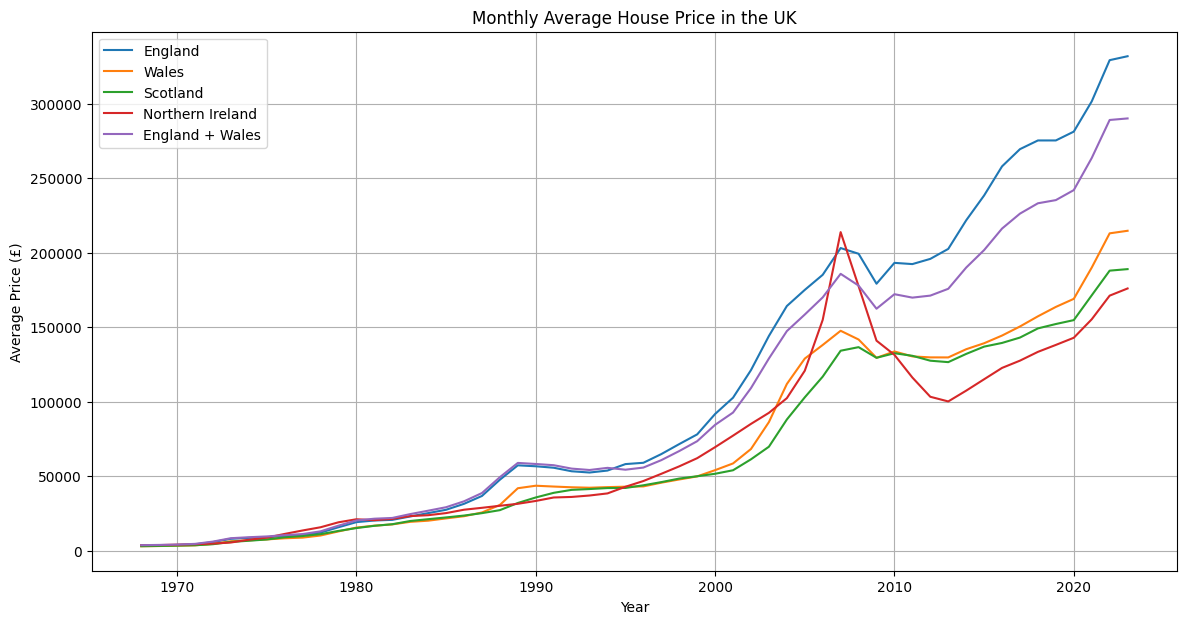

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg_price_eng, label="England")
plt.plot(monthly_avg_price_wales, label="Wales")
plt.plot(monthly_avg_price_scot, label="Scotland")
plt.plot(monthly_avg_price_ni, label="Northern Ireland")
plt.plot(monthly_avg_price_e_w, label="England + Wales")
plt.title("Monthly Average House Price in the UK")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.legend()
plt.grid(True)

plt.show()


# Mortgage Price

In [31]:
mortagage_price_eng = eng_grouped_by_date["MortgagePrice"].mean()
mortagage_price_wales = wales_grouped_by_date["MortgagePrice"].mean()
mortagage_price_scot = scot_grouped_by_date["MortgagePrice"].mean()
mortagage_price_ni = ni_grouped_by_date["MortgagePrice"].mean()
mortagage_price_e_w = eng_wales_grouped_by_date["MortgagePrice"].mean()


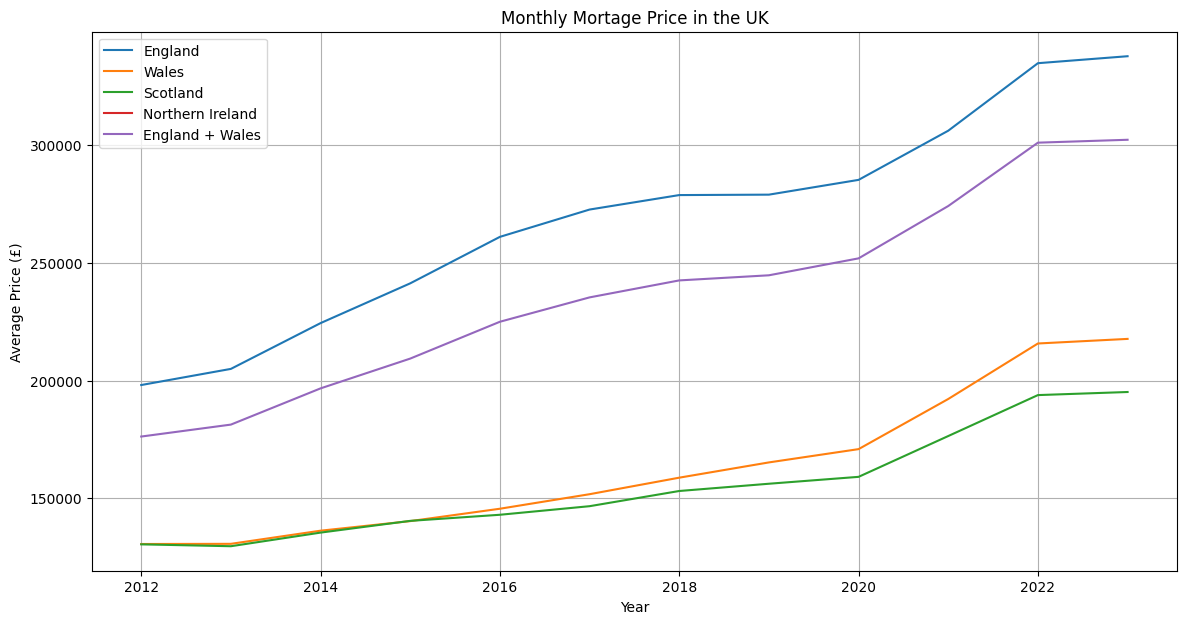

In [32]:
plt.figure(figsize=(14, 7))
plt.plot(mortagage_price_eng, label="England")
plt.plot(mortagage_price_wales, label="Wales")
plt.plot(mortagage_price_scot, label="Scotland")
plt.plot(mortagage_price_ni, label="Northern Ireland")
plt.plot(mortagage_price_e_w, label="England + Wales")
plt.title("Monthly Mortage Price in the UK")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.legend()
plt.grid(True)

plt.show()


# Sales Volume

In [33]:
sales_vol_eng = eng_grouped_by_date["SalesVolume"].sum()
sales_vol_wales = wales_grouped_by_date["SalesVolume"].sum()
sales_vol_scot = scot_grouped_by_date["SalesVolume"].sum()
sales_vol_ni = ni_grouped_by_date["SalesVolume"].sum()
sales_vol_e_w = eng_wales_grouped_by_date["SalesVolume"].sum()


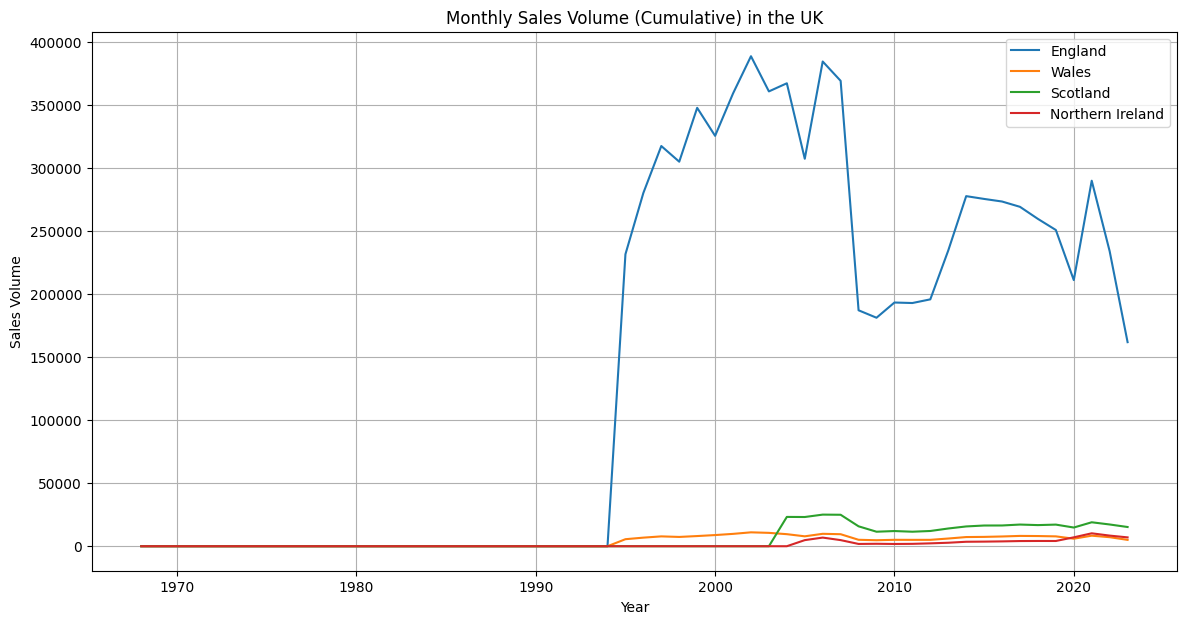

In [34]:
plt.figure(figsize=(14, 7))
plt.plot(sales_vol_eng, label="England")
plt.plot(sales_vol_wales, label="Wales")
plt.plot(sales_vol_scot, label="Scotland")
plt.plot(sales_vol_ni, label="Northern Ireland")
#plt.plot(sales_vol_e_w, label="England + Wales")
plt.title("Monthly Sales Volume (Cumulative) in the UK")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.legend()
plt.grid(True)

plt.show()


In [35]:
sales_vol_avg_eng = eng_grouped_by_date["SalesVolume"].mean()
sales_vol_avg_wales = wales_grouped_by_date["SalesVolume"].mean()
sales_vol_avg_scot = scot_grouped_by_date["SalesVolume"].mean()
sales_vol_avg_ni = ni_grouped_by_date["SalesVolume"].mean()
sales_vol_avg_e_w = eng_wales_grouped_by_date["SalesVolume"].mean()

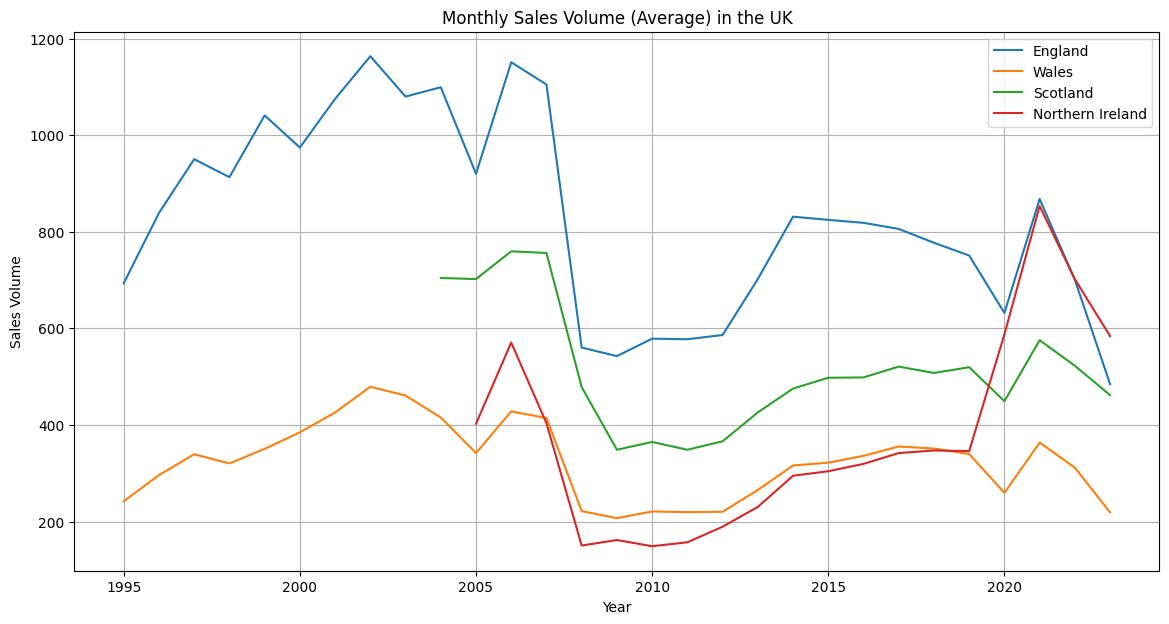

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(sales_vol_avg_eng, label="England")
plt.plot(sales_vol_avg_wales, label="Wales")
plt.plot(sales_vol_avg_scot, label="Scotland")
plt.plot(sales_vol_avg_ni, label="Northern Ireland")
#plt.plot(sales_vol_e_w, label="England + Wales")
plt.title("Monthly Sales Volume (Average) in the UK")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.legend()
plt.grid(True)

plt.show()
